<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/E-Commerce%20Domain%20Analytics%20Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
!pip install gdown

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [3]:
!gdown 102LpTp0wVK6DPmwwQljYSBTPjUCIIql-

Downloading...
From: https://drive.google.com/uc?id=102LpTp0wVK6DPmwwQljYSBTPjUCIIql-
To: /content/price_optimsation_dataset.csv
100% 121k/121k [00:00<00:00, 94.9MB/s]


In [4]:
data11 = pd.read_csv("price_optimsation_dataset.csv")

In [5]:
!gdown 1CmS-dDKvbTCGYlLBfUNGRi5StOP0GOLl

Downloading...
From: https://drive.google.com/uc?id=1CmS-dDKvbTCGYlLBfUNGRi5StOP0GOLl
To: /content/Ecom_CRM_analysis.csv
100% 45.6M/45.6M [00:00<00:00, 92.4MB/s]


In [6]:
data22 = pd.read_csv("Ecom_CRM_analysis.csv",encoding="latin-1")

## Loading Datasets & Changing Data Types

In [7]:
!gdown 1da0C0bzM_eyXLRRQ56EHz0kDzc1sYOUc

Downloading...
From: https://drive.google.com/uc?id=1da0C0bzM_eyXLRRQ56EHz0kDzc1sYOUc
To: /content/CustomersData.xlsx
100% 42.2k/42.2k [00:00<00:00, 79.8MB/s]


In [8]:
CustomersData = pd.read_excel("CustomersData.xlsx")

In [9]:
!gdown 1_-VvRXtcJuX5WpRqVeuGVNa_IfUAgOW8

Downloading...
From: https://drive.google.com/uc?id=1_-VvRXtcJuX5WpRqVeuGVNa_IfUAgOW8
To: /content/Discount_Coupon.csv
100% 4.92k/4.92k [00:00<00:00, 15.0MB/s]


In [10]:
Discount_Coupon = pd.read_csv("Discount_Coupon.csv")

In [11]:
!gdown 1ctNiusdseIZ6Vrvy600oZmu5C1aTbYzV

Downloading...
From: https://drive.google.com/uc?id=1ctNiusdseIZ6Vrvy600oZmu5C1aTbYzV
To: /content/Marketing_Spend.csv
100% 8.67k/8.67k [00:00<00:00, 24.0MB/s]


In [12]:
Marketing_Spend = pd.read_csv("Marketing_Spend.csv")

In [13]:
!gdown 1dkV1EVylOCBXi_qtx4iMCxRKDHcbPVC9

Downloading...
From: https://drive.google.com/uc?id=1dkV1EVylOCBXi_qtx4iMCxRKDHcbPVC9
To: /content/Online_Sales.csv
100% 5.24M/5.24M [00:00<00:00, 180MB/s]


In [14]:
Online_Sales = pd.read_csv("Online_Sales.csv")

In [15]:
!gdown 16Fl-Ddhdj1HhDl1TAmuRg0-RRsUb3X8X

Downloading...
From: https://drive.google.com/uc?id=16Fl-Ddhdj1HhDl1TAmuRg0-RRsUb3X8X
To: /content/Tax_amount.xlsx
100% 9.84k/9.84k [00:00<00:00, 21.9MB/s]


In [16]:
Tax_amount = pd.read_excel("Tax_amount.xlsx")

In [17]:
CustomersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [18]:
CustomersData.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [19]:
Discount_Coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [20]:
Discount_Coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [21]:
Discount_Coupon.Month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [22]:
Marketing_Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [23]:
Marketing_Spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [24]:
Marketing_Spend.Date = pd.to_datetime(Marketing_Spend["Date"])
Marketing_Spend["Month"] = Marketing_Spend.Date.dt.strftime("%b")

In [25]:
Marketing_Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
 3   Month          365 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.5+ KB


In [26]:
Online_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [27]:
Online_Sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [28]:
Online_Sales.Transaction_Date = pd.to_datetime(Online_Sales["Transaction_Date"])
Online_Sales["Transaction_Month"] = Online_Sales.Transaction_Date.dt.strftime("%b")

In [29]:
Online_Sales["Transaction_Month"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [30]:
Online_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Transaction_Month    52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.4+ MB


In [31]:
Online_Sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan


In [32]:
Tax_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [33]:
Tax_amount.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


## Creating Combined Data set

* Merging Online Sales & Discount Coupon into "Data"

In [34]:
data = Online_Sales.merge(Discount_Coupon,how = "left", left_on = ["Product_Category","Transaction_Month"],right_on = ["Product_Category","Month"])

* Merging "data" & Tax_amount

In [35]:
data = data.merge(Tax_amount, how ="left", on = "Product_Category")

* Merging "data" & CustomerData

In [36]:
data = data.merge(CustomersData, how ="left", on = "CustomerID")

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Transaction_Month    52924 non-null  object        
 11  Month                52524 non-null  object        
 12  Coupon_Code          52524 non-null  object        
 13  Discount_pct         52524 non-

In [38]:
data.drop("Month", axis=1,inplace = True)

## Calculating Invoice amount

In [39]:
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,M,Chicago,12
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,M,Chicago,12
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,M,Chicago,12
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,M,Chicago,12


In [40]:
data["Coupon_Status"].value_counts()

Coupon_Status
Clicked     26926
Used        17904
Not Used     8094
Name: count, dtype: int64

* Lets Assume "Clicked" means "Used"

In [41]:
data["Coupon_Status"]= data["Coupon_Status"].transform(lambda x : 1 if x in ["Clicked","Used"] else 0)

In [42]:
data["Coupon_Status"].value_counts()

Coupon_Status
1    44830
0     8094
Name: count, dtype: int64

In [43]:
data["Discount_pct"] = data["Discount_pct"].transform(lambda x : x/100)

In [44]:
data["Invoice_value"] = ((data["Quantity"] * data["Avg_Price"] * (1 - (data["Discount_pct"] * data["Coupon_Status"]))) * (1+data["GST"])) + data["Delivery_Charges"]

In [45]:
data["Invoice_value"].describe()

count    52524.000000
mean        92.165260
std        158.511119
min          4.375440
25%         18.828960
50%         41.672580
75%        123.810000
max       8979.275000
Name: Invoice_value, dtype: float64

In [46]:
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice_value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,1,Jan,ELEC10,0.1,0.10,M,Chicago,12,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,1,Jan,ELEC10,0.1,0.10,M,Chicago,12,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,1,Jan,OFF10,0.1,0.10,M,Chicago,12,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,0,Jan,SALE10,0.1,0.18,M,Chicago,12,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,1,Jan,AIO10,0.1,0.18,M,Chicago,12,24.0230


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  int64         
 10  Transaction_Month    52924 non-null  object        
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  float64       
 13  GST                  52924 non-

In [48]:
# 0 --> Monday , 6 --> Sunday
data["weekday"] = data["Transaction_Date"].dt.weekday

In [49]:
data["month"] =data["Transaction_Date"].dt.month

In [87]:
data.duplicated().sum()

0

* No Duplicates records Found

## EDA

In [50]:
data.nunique()

CustomerID              1468
Transaction_ID         25061
Transaction_Date         365
Product_SKU             1145
Product_Description      404
Product_Category          20
Quantity                 151
Avg_Price                546
Delivery_Charges         267
Coupon_Status              2
Transaction_Month         12
Coupon_Code               45
Discount_pct               3
GST                        4
Gender                     2
Location                   5
Tenure_Months             49
Invoice_value          11985
weekday                    7
month                     12
dtype: int64

## Invoice amount

In [86]:
data["Invoice_value"].describe()

count    52524.000000
mean        92.165260
std        158.511119
min          4.375440
25%         18.828960
50%         41.672580
75%        123.810000
max       8979.275000
Name: Invoice_value, dtype: float64

<Axes: xlabel='Invoice_value'>

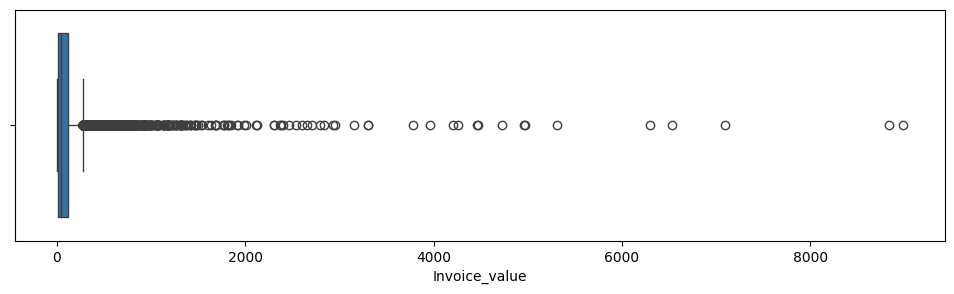

In [89]:
plt.figure(figsize =(12,3))
sns.boxplot(x= data["Invoice_value"])

In [51]:
# Total Revenue
np.round(data["Invoice_value"].sum(axis = 0))

4840888.0

In [52]:
# Average Revenue per month
np.round(data["Invoice_value"].sum(axis = 0)/12)

403407.0

In [53]:
data.groupby("Transaction_Month")["Invoice_value"].sum()

Transaction_Month
Apr    448532.73274
Aug    429508.62784
Dec    467526.63756
Feb    335488.07894
Jan    466692.14849
Jul    426475.32089
Jun    306218.41837
Mar    350379.04421
May    324055.17116
Nov    492131.11102
Oct    455597.80052
Sep    338283.03822
Name: Invoice_value, dtype: float64

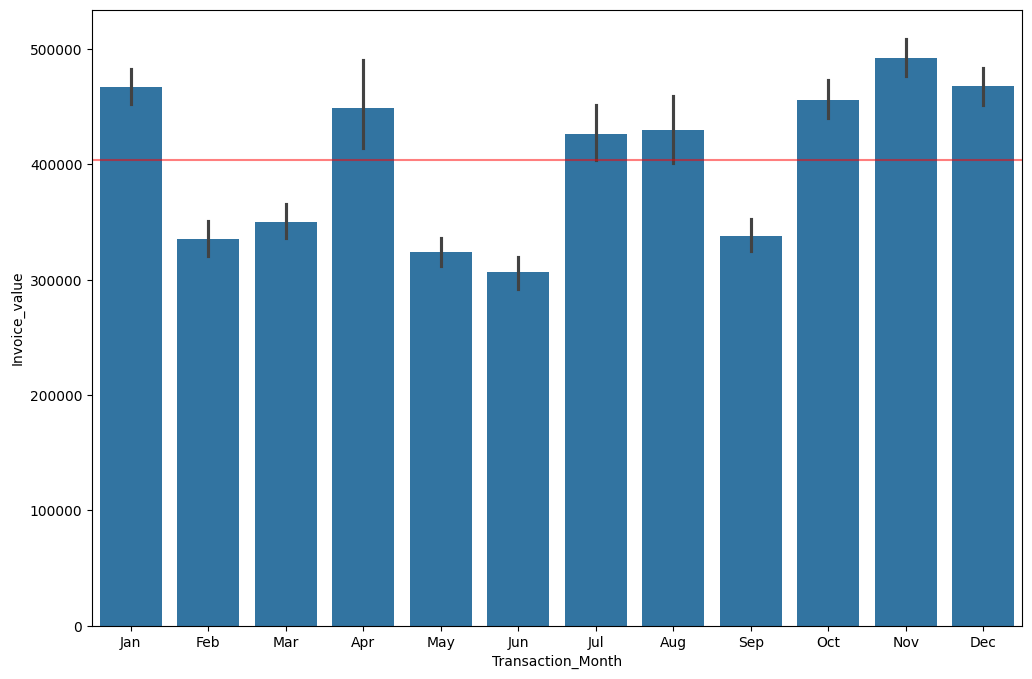

In [54]:
# Average Order value Month Wise
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=data, x="Transaction_Month", y="Invoice_value", estimator = np.sum)
#drawing average line
ax.axhline(np.round(data["Invoice_value"].sum(axis = 0))/12, color='red', alpha = 0.5)

In [55]:
data["Transaction_ID"].nunique()

25061

In [56]:
data.groupby("Transaction_Month")["Transaction_ID"].nunique()

Transaction_Month
Apr    1813
Aug    2414
Dec    2684
Feb    1664
Jan    2102
Jul    2080
Jun    1940
Mar    1991
May    2034
Nov    2282
Oct    2125
Sep    1932
Name: Transaction_ID, dtype: int64

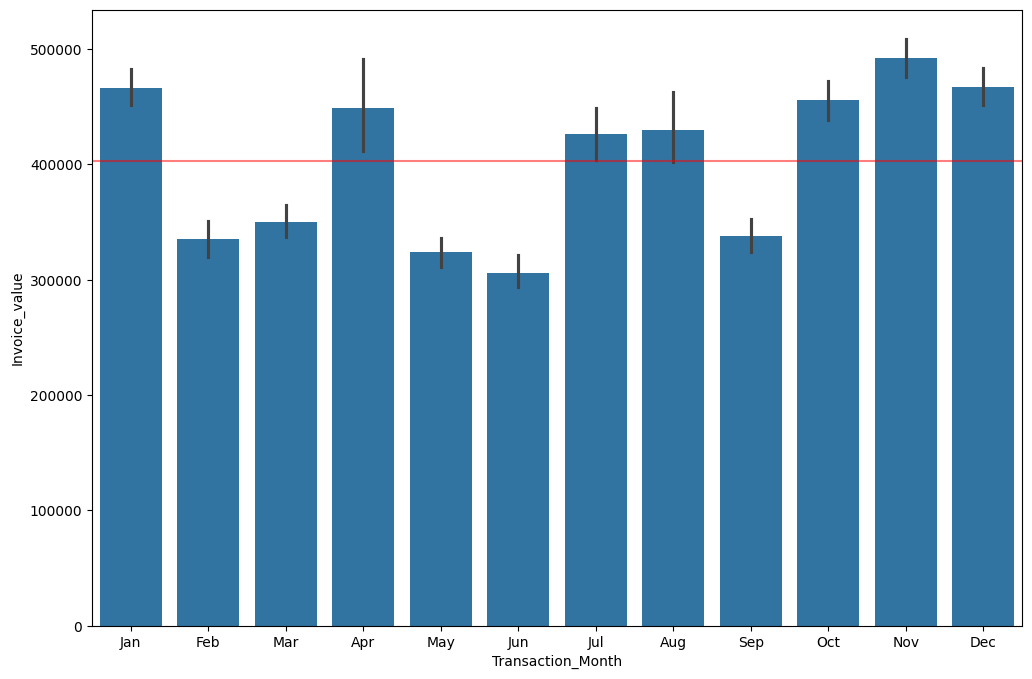

In [67]:
# Total Invoice Values Month wise
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=data, x="Transaction_Month", y="Invoice_value", estimator = np.sum)
#drawing average line
ax.axhline(data["Invoice_value"].sum(axis =0)/12, color='red', alpha = 0.5)

## Average Order Value

In [58]:
data["Invoice_value"].sum(axis =0)/data["Transaction_ID"].nunique()

193.16420453932406

In [59]:
A = data.groupby(["Transaction_Month","Transaction_ID"])["Invoice_value"].sum()
A = A.reset_index()
A

,Transaction_Month,Transaction_ID,Invoice_value
0,Apr,24593,43.04100
1,Apr,24594,700.42832
2,Apr,24595,170.40000
3,Apr,24596,84.71000
4,Apr,24597,261.71000
...,...,...,...
25056,Sep,39470,36.80300
25057,Sep,39471,9.66765
25058,Sep,39472,47.98380
25059,Sep,39473,152.26500


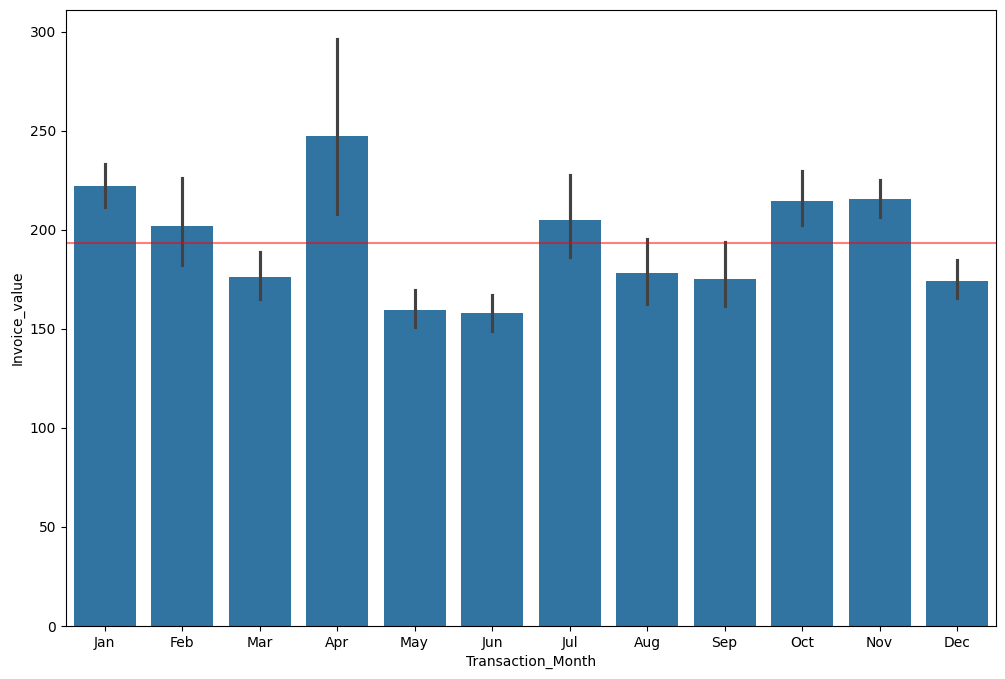

In [60]:
# Average Order value Month Wise
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=A, x="Transaction_Month", y="Invoice_value", estimator = np.mean,order = Online_Sales["Transaction_Month"].unique())
#drawing average line
ax.axhline(data["Invoice_value"].sum(axis =0)/data["Transaction_ID"].nunique(), color='red', alpha = 0.5)

## No of Orders

In [61]:
data["Transaction_ID"].nunique()

25061

In [69]:
A = data.groupby("Transaction_Month")["Transaction_ID"].nunique().reset_index()
A

,Transaction_Month,Transaction_ID
0,Apr,1813
1,Aug,2414
2,Dec,2684
3,Feb,1664
4,Jan,2102
5,Jul,2080
6,Jun,1940
7,Mar,1991
8,May,2034
9,Nov,2282


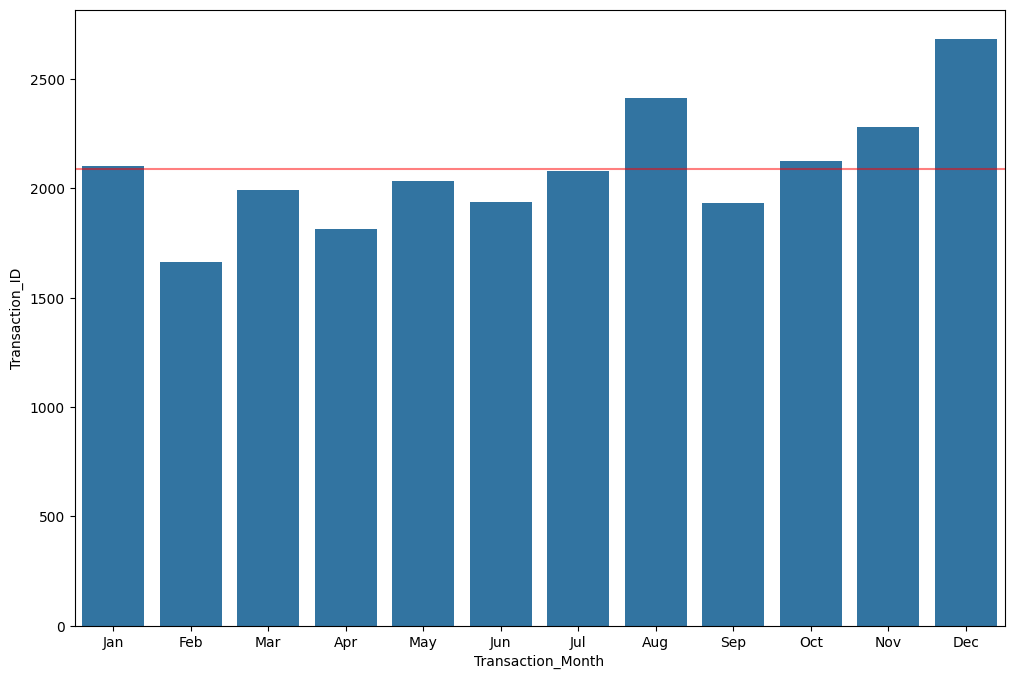

In [70]:
# No of Orders Month Wise
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data = A, x ="Transaction_Month",y = "Transaction_ID", order = Online_Sales["Transaction_Month"].unique())
#drawing average line
ax.axhline(data["Transaction_ID"].nunique()/12, color='red', alpha = 0.5)

## No of Customers

In [64]:
data["CustomerID"].nunique()

1468

In [73]:
A = data.groupby("Transaction_Month")["CustomerID"].nunique().reset_index()
A

,Transaction_Month,CustomerID
0,Apr,224
1,Aug,300
2,Dec,236
3,Feb,109
4,Jan,215
5,Jul,236
6,Jun,259
7,Mar,208
8,May,200
9,Nov,188


In [71]:
# Average No of Customer Visting
data.groupby("Transaction_Month")["CustomerID"].nunique().sum(axis=0)/12

214.83333333333334

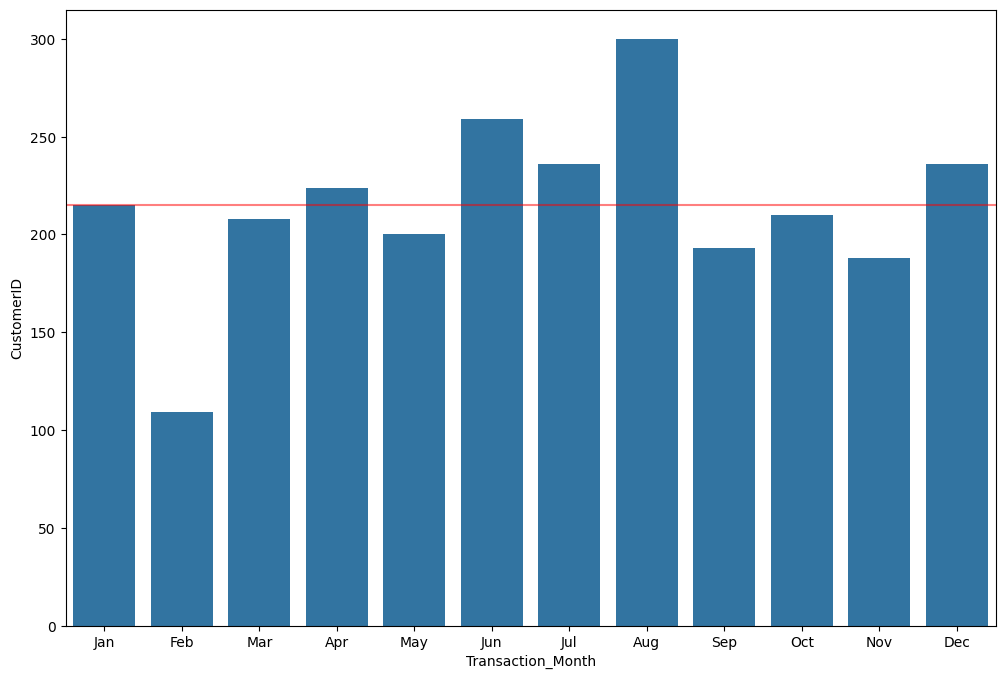

In [74]:
# No of Customer Visiting Each month
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data = A, x ="Transaction_Month",y = "CustomerID", order = Online_Sales["Transaction_Month"].unique())
#drawing average line
ax.axhline(data.groupby("Transaction_Month")["CustomerID"].nunique().sum(axis=0)/12, color='red', alpha = 0.5)

## Customer OnBoarding & Attrition in the Given year

In [90]:
data.groupby("month")["CustomerID"].unique().reset_index()

,month,CustomerID
0,1,"[17850, 13047, 12583, 13748, 15100, 15291, 146..."
1,2,"[13370, 16883, 13520, 12841, 16905, 12427, 179..."
2,3,"[14606, 15953, 16143, 12720, 12748, 16422, 127..."
3,4,"[16016, 14060, 17722, 17324, 17341, 14051, 159..."
4,5,"[15514, 13448, 13787, 17865, 17220, 13798, 165..."
5,6,"[17841, 17017, 15107, 12829, 14051, 13097, 128..."
6,7,"[17841, 14472, 17358, 15581, 14911, 16686, 182..."
7,8,"[13081, 13280, 15845, 13488, 16656, 13715, 151..."
8,9,"[14646, 17685, 15159, 15033, 15570, 14329, 153..."
9,10,"[13854, 18061, 18223, 17504, 14320, 14646, 178..."


In [98]:
A = data.groupby("CustomerID").aggregate({"month":[min,max]}).reset_index()
A.columns = ["CustomerID","firstmonth","lastmonth"]
A

,CustomerID,firstmonth,lastmonth
0,12346,9,9
1,12347,3,11
2,12348,6,10
3,12350,12,12
4,12356,9,9
...,...,...,...
1463,18259,4,4
1464,18260,6,10
1465,18269,4,6
1466,18277,10,10


In [105]:
A.groupby("firstmonth")["CustomerID"].count()

firstmonth
1     215
2      96
3     177
4     163
5     112
6     137
7      94
8     135
9      78
10     87
11     68
12    106
Name: CustomerID, dtype: int64

<Axes: xlabel='firstmonth'>

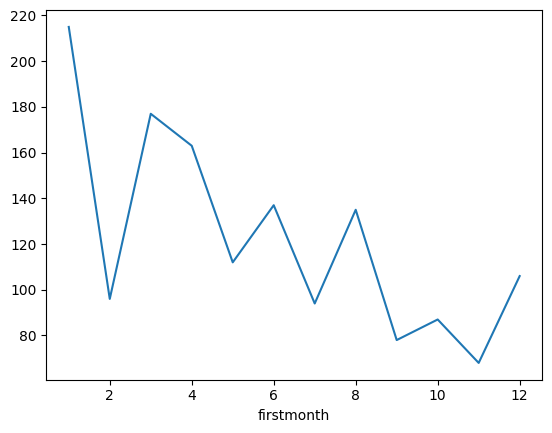

In [103]:
# No of New Customer Joined in Each Month
A.groupby("firstmonth")["CustomerID"].count().plot()

In [107]:
A.groupby("lastmonth")["CustomerID"].count()

lastmonth
1      96
2      31
3      74
4      99
5      83
6     118
7     113
8     166
9     138
10    154
11    160
12    236
Name: CustomerID, dtype: int64

<Axes: xlabel='lastmonth'>

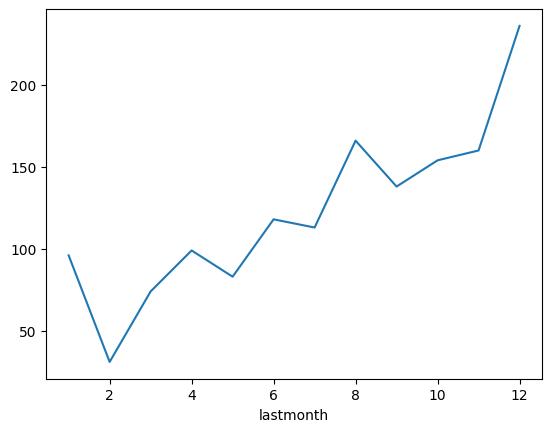

In [108]:
# No of Customer who dropped off in each month
A.groupby("lastmonth")["CustomerID"].count().plot()

## Average time between Orders for Customer

In [109]:
data.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Transaction_Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Gender', 'Location', 'Tenure_Months',
       'Invoice_value', 'weekday', 'month'],
      dtype='object')

In [59]:
A=data.groupby("CustomerID").aggregate({"Transaction_Date":[min,max]}).reset_index()
A.columns = ["CustomerID","firsttransaction","Lasttrasaction"]
A

,CustomerID,firsttransaction,Lasttrasaction
0,12346,2019-09-15,2019-09-15
1,12347,2019-03-24,2019-11-02
2,12348,2019-06-22,2019-10-19
3,12350,2019-12-14,2019-12-14
4,12356,2019-09-15,2019-09-15
...,...,...,...
1463,18259,2019-04-05,2019-04-05
1464,18260,2019-06-22,2019-10-05
1465,18269,2019-04-05,2019-06-20
1466,18277,2019-10-23,2019-10-23


In [57]:
B=data.groupby("CustomerID")["Transaction_ID"].nunique()
B

CustomerID
12346     1
12347    31
12348     8
12350    11
12356    13
         ..
18259     3
18260    19
18269     2
18277     1
18283    53
Name: Transaction_ID, Length: 1468, dtype: int64

In [82]:
C = A.merge(B,on ="CustomerID")
C.rename(columns = {'Transaction_ID':'No of Transactions'}, inplace = True)
C

,CustomerID,firsttransaction,Lasttrasaction,No of Transactions
0,12346,2019-09-15,2019-09-15,1
1,12347,2019-03-24,2019-11-02,31
2,12348,2019-06-22,2019-10-19,8
3,12350,2019-12-14,2019-12-14,11
4,12356,2019-09-15,2019-09-15,13
...,...,...,...,...
1463,18259,2019-04-05,2019-04-05,3
1464,18260,2019-06-22,2019-10-05,19
1465,18269,2019-04-05,2019-06-20,2
1466,18277,2019-10-23,2019-10-23,1


In [83]:
C["ActiveDays"] =(C["Lasttrasaction"]-C["firsttransaction"])/np.timedelta64(1, 'D')
#C["ActiveDays"]= C["ActiveDays"].transform(lambda x : x if x!= 0.0 else 365)
C

,CustomerID,firsttransaction,Lasttrasaction,No of Transactions,ActiveDays
0,12346,2019-09-15,2019-09-15,1,0.0
1,12347,2019-03-24,2019-11-02,31,223.0
2,12348,2019-06-22,2019-10-19,8,119.0
3,12350,2019-12-14,2019-12-14,11,0.0
4,12356,2019-09-15,2019-09-15,13,0.0
...,...,...,...,...,...
1463,18259,2019-04-05,2019-04-05,3,0.0
1464,18260,2019-06-22,2019-10-05,19,105.0
1465,18269,2019-04-05,2019-06-20,2,76.0
1466,18277,2019-10-23,2019-10-23,1,0.0


<Axes: xlabel='ActiveDays', ylabel='No of Transactions'>

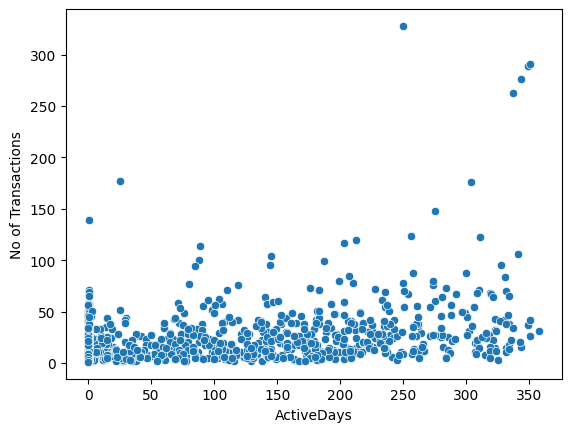

In [84]:
sns.scatterplot(data=C, x ="ActiveDays", y="No of Transactions")

In [85]:
data[data.CustomerID == 18259]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Month,Coupon_Code,Discount_pct,GST,Gender,Location,Tenure_Months,Invoice_value,weekday,month
12216,18259,24877,2019-04-05,GGOEGOCL077699,Google Hard Cover Journal,Notebooks & Journals,30,11.99,28.69,1,Apr,NJ10,0.1,0.05,F,California,5,368.60650,4,4
12217,18259,24878,2019-04-05,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1,17.59,6.50,1,Apr,NaN,NaN,0.18,F,California,5,NaN,4,4
12218,18259,24878,2019-04-05,GGOEGDWR015799,Red Shine 15 oz Mug,Drinkware,1,10.39,6.50,0,Apr,EXTRA10,0.1,0.18,F,California,5,18.76020,4,4
12219,18259,24879,2019-04-05,GGOEGAAJ032813,Google Men's Long & Lean Tee Charcoal,Apparel,4,11.19,59.16,1,Apr,SALE10,0.1,0.18,F,California,5,106.69512,4,4
12220,18259,24879,2019-04-05,GGOEGAAJ032814,Google Men's Long & Lean Tee Charcoal,Apparel,4,11.19,59.16,1,Apr,SALE10,0.1,0.18,F,California,5,106.69512,4,4
12221,18259,24879,2019-04-05,GGOEGAAJ032815,Google Men's Long & Lean Tee Charcoal,Apparel,4,11.19,59.16,1,Apr,SALE10,0.1,0.18,F,California,5,106.69512,4,4
12222,18259,24879,2019-04-05,GGOEGAAJ032816,Google Men's Long & Lean Tee Charcoal,Apparel,2,11.19,59.16,1,Apr,SALE10,0.1,0.18,F,California,5,82.92756,4,4
